In [1]:
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

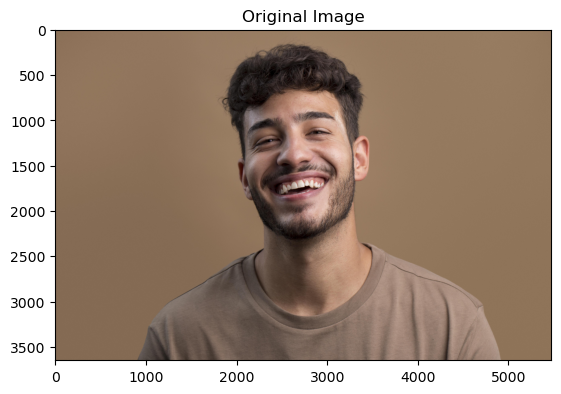

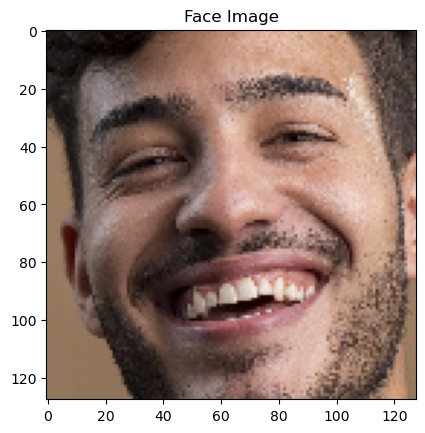

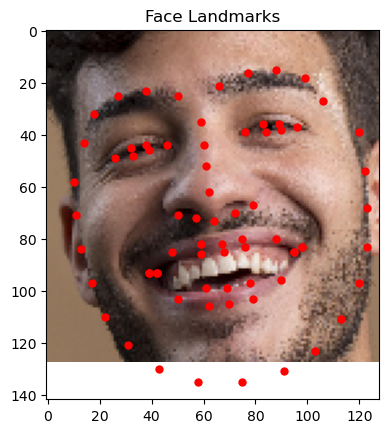

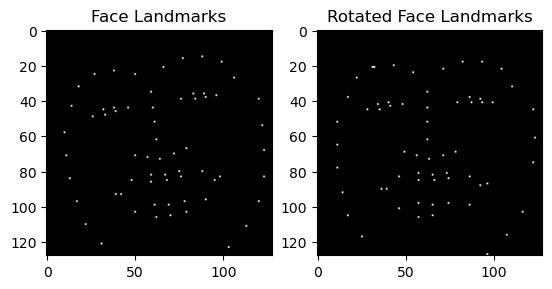

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [4]:
def rotate_image(image_array, angle):
    # Convert the numpy array to a PIL Image object
    img = Image.fromarray(image_array.astype('uint8').squeeze(), 'L')  # 'L' mode for grayscale

    # Rotate the image by the given angle
    rotated_img = img.rotate(angle)

    # Resize the image back to 128x128
    resized_rotated_img = rotated_img.resize((128, 128))

    # Convert the PIL Image back to a numpy array and reshape to (128, 128, 1)
    rotated_image_array = np.array(resized_rotated_img)
    rotated_image_array = rotated_image_array.reshape((128, 128, 1))

    return rotated_image_array


image = face_recognition.load_image_file("./images/smile 1.jpg")
plt.imshow(image)
plt.title("Original Image")
plt.show()

face_locations = face_recognition.face_locations(image)
top, right, bottom, left = face_locations[0]
face_image = image[top:bottom, left:right]

IMG_SIZE = (128,128)
# resize image to 250x250
face_image = cv2.resize(face_image,IMG_SIZE)

plt.imshow(face_image)
plt.title("Face Image")
plt.show()


# get landmark from face_image
face_landmarks = face_recognition.face_landmarks(face_image)
face_landmarks = face_landmarks[0]
plt.imshow(face_image)

for k,v in face_landmarks.items():
    # print(k,':',v)
    for i in range(len(v)):
        # plot only if point is not outside of image
        # if v[i][0] < 250 and v[i][1] < 250 and v[i][0] > 0 and v[i][1] > 0:
        #     plt.plot(v[i][0],v[i][1],color='red',marker='o',markersize=5)
        plt.plot(v[i][0],v[i][1],color='red',marker='o',markersize=5)
plt.title("Face Landmarks")
plt.show()



#create a blank binary image with landmarks
blank_image = np.zeros((IMG_SIZE[0],IMG_SIZE[1],1), np.uint8)

# plot landmarks on blank image
for k,v in face_landmarks.items():
    # print(k,':',v)
    for i in range(len(v)):
        # plot only if point is not outside of image
        if v[i][0] < IMG_SIZE[0] and v[i][1] < IMG_SIZE[1] and v[i][0] > 0 and v[i][1] > 0:
            blank_image[v[i][1],v[i][0]] = 1

top_nose_bridge = face_landmarks['nose_bridge'][0]
bottom_nose_bridge = face_landmarks['nose_bridge'][-1]

# Calculate the angle between the nose bridge and the vertical
dY = bottom_nose_bridge[1] - top_nose_bridge[1]
dX = bottom_nose_bridge[0] - top_nose_bridge[0]
angle = np.degrees(np.arctan2(dY, dX)) - 90  # Subtracting 90 degrees to align vertically

rotated_image = rotate_image(blank_image, angle)
# print(angle)
plt.subplot(1,2,1)
plt.imshow(blank_image,cmap='gray')
plt.title("Face Landmarks")

plt.subplot(1,2,2)
plt.imshow(rotated_image,cmap='gray')
plt.title("Rotated Face Landmarks")


plt.show()  
print(blank_image)
print(rotated_image)

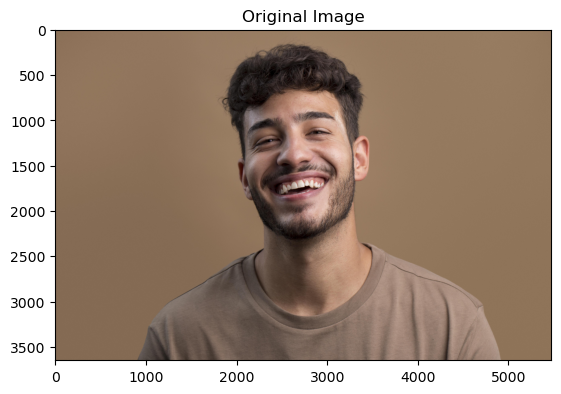

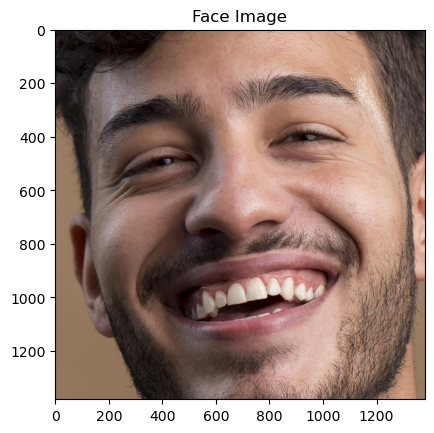

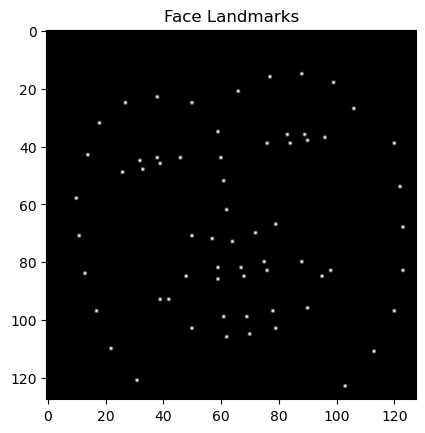

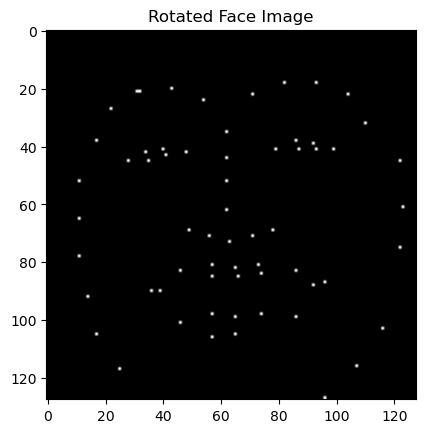

In [8]:
def process_image(face_image):
    # Resize image to 128x128 if it's not already
    IMG_SIZE = (128, 128)
    if face_image.shape[:2] != IMG_SIZE:
        face_image = cv2.resize(face_image, IMG_SIZE)
    
    # Get facial landmarks
    face_landmarks_list = face_recognition.face_landmarks(face_image)
    
    # For simplicity, we take the first set of landmarks
    face_landmarks = face_landmarks_list[0] if face_landmarks_list else None
    
    if not face_landmarks:
        raise ValueError("No facial landmarks were detected.")

    # Create a blank image with the same size as the face_image
    blank_image = np.zeros((IMG_SIZE[0], IMG_SIZE[1], 1), np.uint8)

    # Plot landmarks on the blank image
    for feature in face_landmarks:
        for point in face_landmarks[feature]:
            x, y = point
            if 0 <= x < IMG_SIZE[0] and 0 <= y < IMG_SIZE[1]:
                blank_image[y, x] = 255  # white color for the landmark points

    # Get the nose bridge points to calculate the rotation angle
    if 'nose_bridge' in face_landmarks:
        top_nose_bridge = face_landmarks['nose_bridge'][0]
        bottom_nose_bridge = face_landmarks['nose_bridge'][-1]
        dY = bottom_nose_bridge[1] - top_nose_bridge[1]
        dX = bottom_nose_bridge[0] - top_nose_bridge[0]
        angle = np.degrees(np.arctan2(dY, dX)) - 90
    else:
        raise ValueError("Nose bridge landmarks are required for rotation calculation but were not found.")

    # Rotate the blank image with landmarks
    img = Image.fromarray(blank_image.astype('uint8').squeeze(), 'L')
    rotated_img = img.rotate(angle)
    resized_rotated_img = rotated_img.resize(IMG_SIZE)
    rotated_image_array = np.array(resized_rotated_img)
    rotated_image_array = rotated_image_array.reshape((IMG_SIZE[0], IMG_SIZE[1], 1))

    return rotated_image_array


image = face_recognition.load_image_file("./images/smile 1.jpg")
plt.imshow(image)
plt.title("Original Image")
plt.savefig('original_image.png')
plt.show()
# save image
# plt.imsave('original_image.png',image)

face_locations = face_recognition.face_locations(image)
top, right, bottom, left = face_locations[0]
face_image = image[top:bottom, left:right]

rotated_image = process_image(face_image)


plt.imshow(face_image)
plt.title("Face Image")
plt.savefig('face_image.png')
plt.show()


plt.imshow(blank_image,cmap='gray')
plt.title("Face Landmarks")
plt.savefig('face_landmarks.png')
plt.show()

plt.imshow(rotated_image,cmap='gray')
plt.title("Rotated Face Image")
plt.savefig('rotated_face_image.png')
plt.show()